# <center> Thesis Title: Negative Mass Cosmology with SNIa and BAO Data </center>
## <center> Author: Arta Khosravi </center>
### <center> Supervisors: Prof. Marzieh Farhang and Prof. Hossein Shojaei </center>

# Table of contents
1. [Libraries](#Lib)
2. [Datasets](#DS)
3. [Histogram - Distribution of adundance VS. redshift](#Hist)
4. [Marginalized Likelihood Distribution Plots](#plots)
    1. [SNIa'14 Plots](#SNIa14)
        1. [VS. $\Omega_m$](#Om14curved)
        2. [VS. $\Omega_\Lambda$](#OL14curved)
        3. [$\mu_p$ VS. z](#distmodsnia)
    2. [BAO Plots](#BAO)
        1. [VS. $\Omega_m$](#OmBAOcurved)
        2. [VS. $\Omega_\Lambda$](#OLBAOcurved)
        3. [$D_v$ VS. z](#DVvsZ)
5. [BAO Data Plot](#DVvsZdata)
        

### First, We'll import the required libraries: <a name="Lib"></a>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy.integrate import quad
import scipy.integrate as integrate
import math
from tqdm import tqdm
from Source_NMC.NMC_constants import *
from Source_NMC.NMC_functions import *

## Now we'll import the SNIa and BAO Datasets: <a name="DS"></a>

In [2]:
data14=pd.read_csv('SNIa14.csv')
data14=data14.drop(columns=['Unnamed: 0'])
zdorg=np.arange(0,max(data14['z']),0.01); 
#z for filling in the empty spaces between redshift bins for integrating a positive amount of H^2
zd1=data14['z'];M0=data14['Miu0'];Sigma0=data14['Sigma0'];

data07=pd.read_csv('SNIa07.csv')
data07=data07.drop(columns=['Unnamed: 0'])

data98mlcs=pd.read_csv('SNIa98mlcs.csv')
data98mlcs=data98mlcs.drop(columns=['Unnamed: 0'])

data98tf=pd.read_csv('SNIa98tf.csv')
data98tf=data98tf.drop(columns=['Unnamed: 0'])

DVflrd=[];DVfpl=[]; 
DV=pd.read_csv('Source_NMC\Planck_dv.csv')
DV=DV.reset_index(drop=True).drop(columns=['Unnamed: 20','reference','recon'])
DV = DV[DV['Dv/rd'].notna()];DV=DV.reset_index(drop=True)
Dvrd=DV['Dv/rd'].values;Dvz=DV['Effective z'].values;DV['Dv/rdrag planck']=DV['DV(rsfid/rs) [Mpc]']/rdrag;
for i in range(len(DV)): DVfpl.append(Dvflat(DV['Effective z'][i],OMP,OLP,0,-1)/rdint(zdrag,OMP,OLP,0,-1))
for i in range(len(DV)): DVflrd.append(Dvflat(Dvz[i],0.3111,0.6889,0,-1)/rdrag)
print('\n',data14.columns,'\n',data07.columns,'\n',data98mlcs.columns,'\n',data98tf.columns,'\n',DV.columns,'\n'
      ,'Len of SNIa 2014 dataset: ',len(data14),'\n','Len of SNIa 2007 dataset: ',len(data07),'\n',
      'Len of SNIa 1998 MLCS dataset: ',len(data98mlcs),'\n',
      'Len of SNIa 2014 TF dataset: ',len(data98tf),'\n',
      'Len of Planck BAO dataset: ',len(DV))


 Index(['Miu0', 'z', 'Sigma0'], dtype='object') 
 Index(['Miu0', 'z', 'Sigma0'], dtype='object') 
 Index(['Miu0', 'z', 'Sigma0'], dtype='object') 
 Index(['Miu0', 'z', 'Sigma0'], dtype='object') 
 Index(['ref', 'Effective z', 'DV(rsfid/rs) [Mpc]', 'Dverrpos', 'Dverrneg',
       'DA/rd', 'Daerrpos', 'Daerrneg', 'DM', 'DM/rd', 'Dmerrpos', 'Dmerrneg',
       'rd,fid(MPC)', 'Dv/rd', 'DV/rd_err_pos', 'DV/rd_err_neg',
       'dm/rd_err_pos', 'dm/rd_err_neg', 'Dv/rdrag planck'],
      dtype='object') 
 Len of SNIa 2014 dataset:  60 
 Len of SNIa 2007 dataset:  41 
 Len of SNIa 1998 MLCS dataset:  10 
 Len of SNIa 2014 TF dataset:  10 
 Len of Planck BAO dataset:  14


# Plots: <a name="plots"></a>

### We'll plot a quick histogram to have a grasp on our data's distribution VS. z: <a name="Hist"></a>

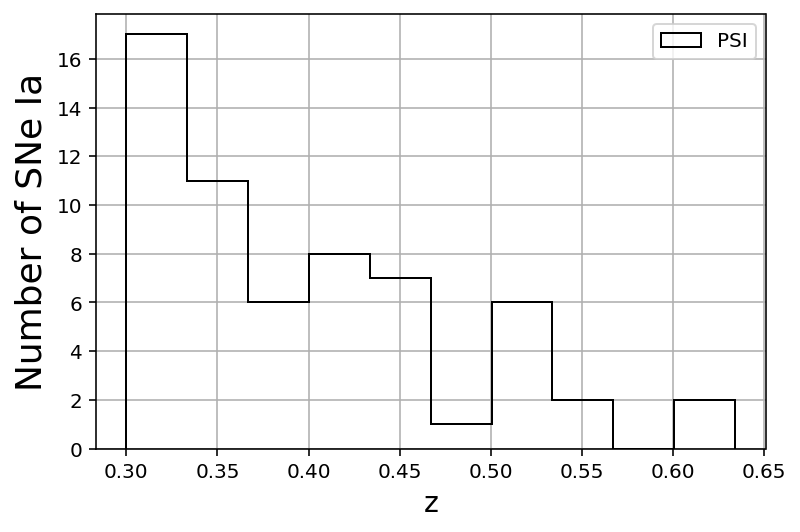

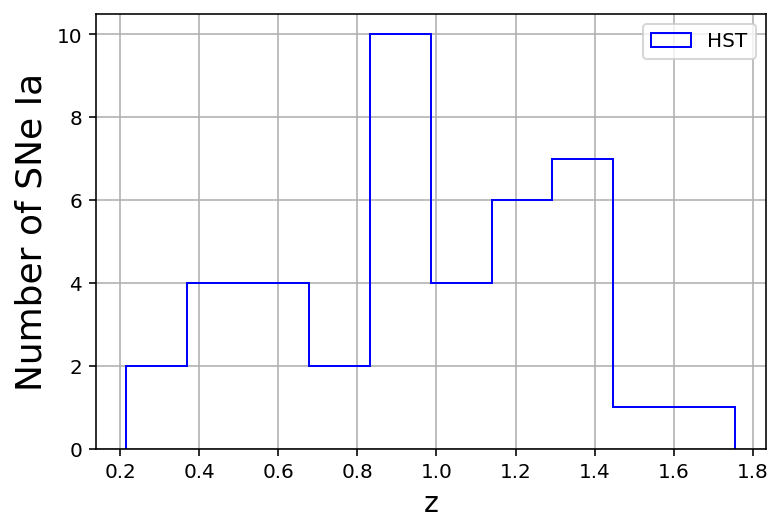

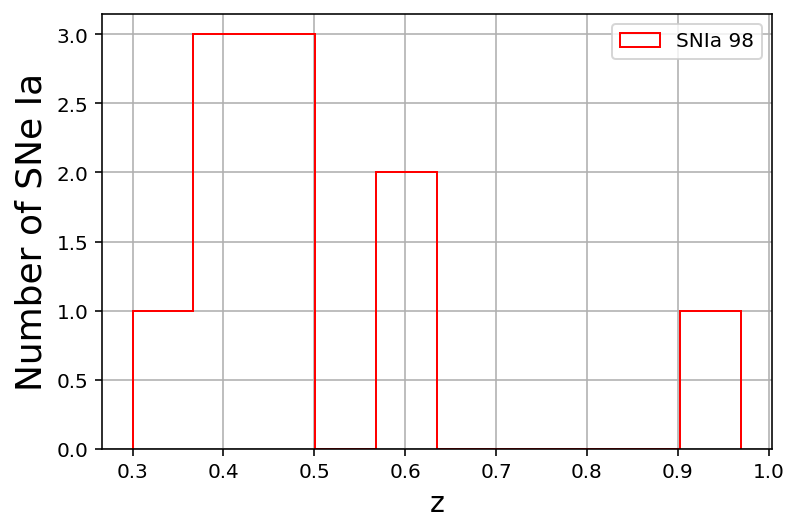

In [4]:
def plot_histogram(z, c,lab):
    plt.hist(z,histtype='step',color=c, linestyle='-',stacked=True,fill=False,label=lab)
    plt.ylabel('Number of SNe Ia',size=18)
    plt.xlabel('z',size=14) 
    plt.grid(True)
    plt.legend()
    plt.show()
plot_histogram(data14['z'], 'black','PSI')
plot_histogram(data07['z'], 'b','HST')
plot_histogram(data98tf['z'], 'r','SNIa 98')

### For SNIa: <a name="SNIa14"></a>

In [3]:
OMS=np.arange(-15,15, 0.1)
OML=np.arange(-15,15,0.1)
WS=[-1]
negH2=[];H2gen=[];
chi2=np.zeros([len(OMS),len(OML)])

def chi2f(om,ol,w):
    chisqlist=[]
    if (1-om-ol-OR)>0:
        for izr in range(len(M0)):  
            dl=DL(zd1[izr],om,ol,0,-1)
            chisqlist.append((X2(Mp(dl),M0[izr],Sigma0[izr])))
    elif (1-om-ol-OR)==0:
        for izr in range(len(M0)):  
            dl=DLflat(zd1[izr],om,ol,0,-1)
            chisqlist.append((X2(Mp(dl),M0[izr],Sigma0[izr])))
    else:
        for izr in range(len(M0)):  
            dl=DLneg(zd1[izr],om,ol,0,-1)
            chisqlist.append((X2(Mp(dl),M0[izr],Sigma0[izr])))        
    chi2=np.sum(chisqlist)  
    return (chi2)

def likelihood(chi):
    return np.exp(-(chi-np.min(chi))/2)

#both work the same, no time difference
#I:
""""
for iom in tqdm(range(len(OMS))):
    for iol in (range(len(OML))):
        pr = 1
        for izd in range(len(zdorg)):
            #chis=0
            H2pr=H2(zdorg[izd],OMS[iom],OML[iol],0,-1)
            if H2pr<0:
                pr=0
                #chis=1e+40
                chi2[iom][iol]=chis
        if pr==1: 
            chi2[iom][iol]=chi2f(OMS[iom],OML[iol],-1)
"""""
#II:
for iom in tqdm(range(len(OMS))):
    for iol in (range(len(OML))):
        pr = 1
        izd=0
        while pr==1 and izd<len(zdorg):
            H2pr=H2(zdorg[izd],OMS[iom],OML[iol],0,-1)
            if H2pr<0:
                pr=0
                chi2[iom][iol]=1e+40
            izd=izd+1
        if pr==1: 
            #second prior:
            prior = 1
            izdr=0
            while prior==1 and izdr<len(zd1):
                H2arr=H2(zd1[izdr],OMS[iom],OML[iol],0,-1)
                if H2arr<0:
                    prior=0
                    chi2[iom][iol]=1e+40
                izdr=izdr+1
            if prior==1: 
                chi2[iom][iol]=chi2f(OMS[iom],OML[iol],-1)
likel=[];likem=[]
for iol in range(len(OML)):
    likel.append(sum(likelihood(chi2)[:,iol]))
for iom in range(len(OMS)):
    likem.append(sum(likelihood(chi2)[iom,:]))

 68%|██████████████████████████████████████████████████████▍                         | 204/300 [04:13<03:25,  2.15s/it]C:\Users\Asus\Source_NMC\NMC_functions.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  res=integrate.quad((lambda x : 1/(np.sqrt(H2(x,om,omneg,ol,w)))),0,z)
100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [08:36<00:00,  1.72s/it]


In [15]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

### Marginalized Normal Likelihood VS. $\Omega_m$: <a name="Om14curved"></a>

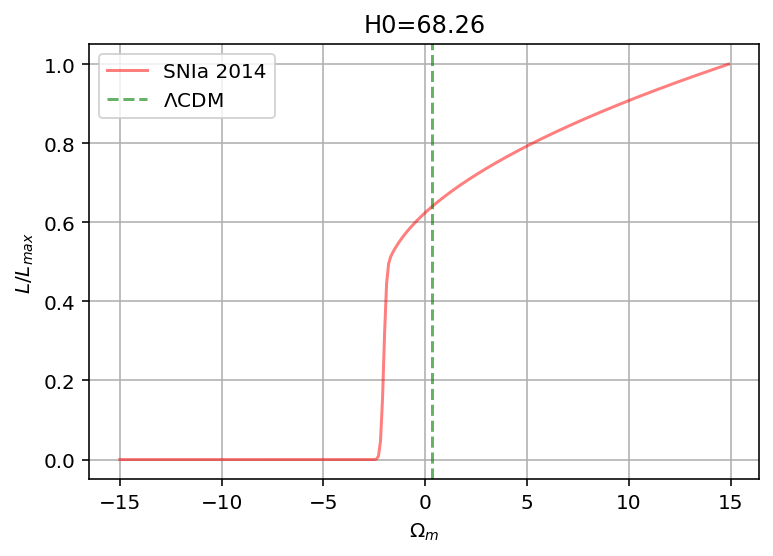

In [4]:
plt.plot(OMS,NormalizeData(likem),c='r',alpha=0.5,label='SNIa 2014')
plt.axvline(0.32, ymin=0, ymax=max(likem),c='g',alpha=0.6,linestyle='--',label='$\Lambda$CDM')
plt.ylabel('$L/L_{max}$')
plt.xlabel(r'$\Omega_{m}$')
plt.legend(loc='best')
plt.title('H0=68.26')
plt.grid()
plt.show()

### Marginalized Normal Likelihood VS. $\Omega_\Lambda$: <a name="OL14curved"></a>

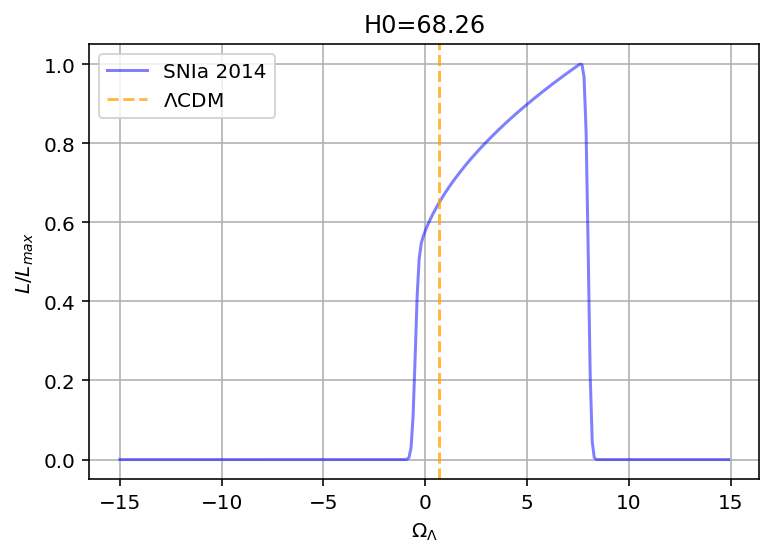

In [5]:
plt.plot(OML,NormalizeData(likel),c='b',alpha=0.5,label='SNIa 2014')
plt.axvline(0.68, ymin=0, ymax=max(likel),c='orange',alpha=0.75,linestyle='--',label='$\Lambda$CDM')
plt.ylabel('$L/L_{max}$')
plt.xlabel(r'$\Omega_{\Lambda}$')
plt.legend(loc='best')
plt.title('H0=68.26')
plt.grid()
plt.show()

In [6]:
dfom=pd.DataFrame({'LH_marg_om':likem,'OM':OMS})
dfoms=dfom.sort_values('LH_marg_om',ascending=False).reset_index(drop=True)
dneg=pd.DataFrame({'LH_marg_L':likel,'OML':OML})
dnegs=dneg.sort_values('LH_marg_L',ascending=False).reset_index(drop=True)

### Distance Modulus VS. Redshift based on the best fits of $\Omega_m$ and $\Omega_\Lambda$: 
<a name="distmodsnia"></a>

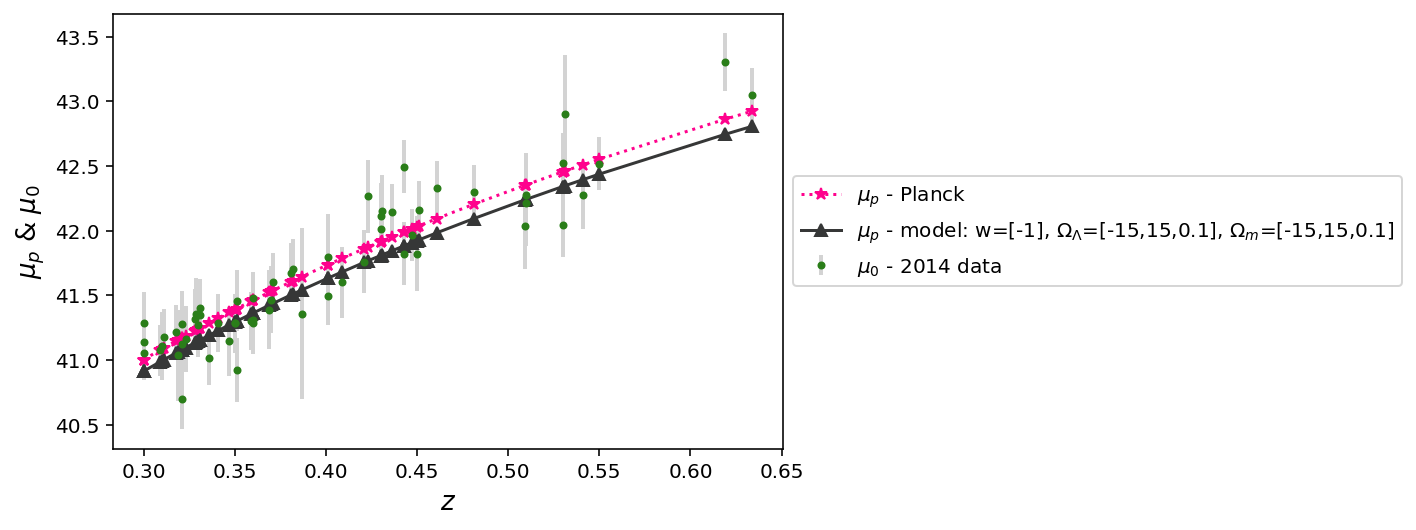

In [7]:
dl14 = [];dl14p = [];
for i in range(len(zd1)):
    dl14.append(DL(zd1[i], dfoms['OM'].iloc[0], dnegs['OML'].iloc[0], 0, -1) 
                if (1 - dfoms['OM'].iloc[0] - dnegs['OML'].iloc[0]) > 0 
                else DLflat(zd1[i], dfoms['OM'].iloc[0], dnegs['OML'].iloc[0], 0, -1) 
                if (1 - dfoms['OM'].iloc[0] - dnegs['OML'].iloc[0]) == 0 
                else DLneg(zd1[i], dfoms['OM'].iloc[0], dnegs['OML'].iloc[0], 0, -1))
    dl14p.append(DL(zd1[i], OMP, 0, OLdw, 0) 
                 if (1 - OMP - OLdw - OR) > 0 else DLflat(zd1[i], OMP, 0, OLdw, 0) 
                 if (1 - OMP - OLP) == 0 else DLneg(zd1[i], OMP, 0, OLdw, 0)
                 if (1 - OMP - OLuw - OR) < 0 else None)
dl14p = [x for x in dl14p if x is not None]
err14 = np.sqrt((Sigma0 ** 2 + Sigmav ** 2))
MP14 = Mp(dl14p); MM14 = Mp(dl14)
orderzd = np.argsort(zd1)
zd14sorted = zd1[orderzd]
# planck:
MP14sorted = MP14[orderzd]
# model:
MM14sorted = MM14[orderzd]
# data:
M014sorted = M0[orderzd]
plt.plot(zd14sorted, np.array(MP14sorted), c='xkcd:hot pink', marker='*', linestyle=':', 
         label='$\u03BC_p$ - Planck') # planck 2014
plt.errorbar(zd14sorted, np.array(M014sorted), yerr=err14, c='xkcd:tree green', marker='.', fmt='s', 
             ecolor='lightgray', elinewidth=2, capsize=0, label='$\u03BC_0$ - 2014 data', linestyle='none') # riess 2014
plt.plot(zd14sorted, np.array(MM14sorted), c='xkcd:dark grey', marker='^', 
         label='$\u03BC_p$ - model: w=[-1], $\Omega_{\Lambda}$=[-15,15,0.1], $\Omega_{m}$=[-15,15,0.1]') # riess 2014

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})
plt.ylabel('$\u03BC_p$ & $\u03BC_0$', size='13')
plt.xlabel('$z$', size='13')
plt.show()


## For BAO: <a name="BAO"></a>

In [4]:
OMSBAO=np.arange(-1,1, 0.1)
OMLBAO=np.arange(-1,1, 0.1)

WS=[-1]
negH2=[];H2gen=[];
chi2=np.zeros([len(OMSBAO),len(OMLBAO)])
Miup=[];dv14=[]
Sigmadv=DV['DV/rd_err_pos']
def chi2f(om,omneg,w):
    chisqlist=[]
    if (1-om-omneg)>0:
        for izr in range(len(Dvz)):
            dv=Dvrdp(Dvz[izr],om,omneg,0,-1)
            chisqlist.append(X2dv(dv,Dvrd[izr],Sigmadv[izr]))
    elif (1-om-omneg)==0:
        for izr in range(len(Dvz)):  
            dv=Dvrdflat(Dvz[izr],om,omneg,0,-1)
            chisqlist.append(X2dv(dv,Dvrd[izr],Sigmadv[izr]))
    else:
        for izr in range(len(Dvz)): 
            dv=Dvrdneg(Dvz[izr],om,omneg,0,-1)
            chisqlist.append(X2dv(dv,Dvrd[izr],Sigmadv[izr]))
    chi2=np.sum(chisqlist)  
    return (chi2)

def likelihood(chi):
    return np.exp(-(chi-np.min(chi))/2)

zddv=np.logspace(-2,4,1000)
for iom in tqdm(range(len(OMSBAO))):
    for iol in (range(len(OMLBAO))):
        pr = 1
        izd=0
        while pr==1 and izd<len(zddv):
            H2pr=H2(zddv[izd],OMSBAO[iom],OMLBAO[iol],0,-1)
            if H2pr<0:
                pr=0
                chi2[iom][iol]=1e+40
            izd=izd+1
        if pr==1: 
            chi2[iom][iol]=chi2f(OMSBAO[iom],OMLBAO[iol],-1)                  
                    
                    
likelBAO=[];likemBAO=[]
for iol in range(len(OMSBAO)):
    likelBAO.append(sum(likelihood(chi2)[:,iol]))
for iom in range(len(OMLBAO)):
    likemBAO.append(sum(likelihood(chi2)[iom,:]))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  6.08it/s]


### Marginalized Normal Likelihood VS. $\Omega_m$: <a name="OmBAOcurved"></a>

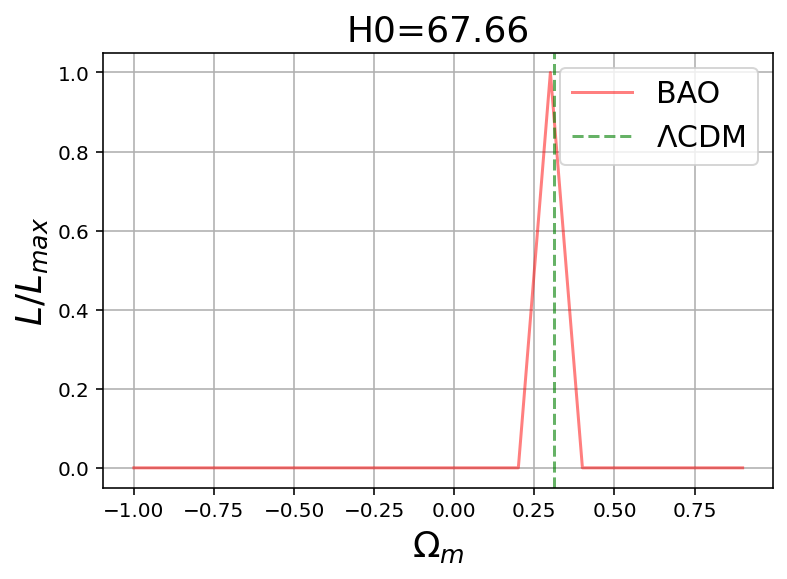

In [6]:
plt.plot(OMSBAO,likemBAO,c='r',alpha=0.5,label='BAO')
plt.axvline(0.3111, ymin=0, ymax=max(likemBAO),c='g',alpha=0.6,linestyle='--',label='$\Lambda$CDM')
plt.ylabel('$L/L_{max}$',size='18')
plt.xlabel(r'$\Omega_{m}$',size='18')
plt.legend(loc='best', prop={'size': 15})
plt.title('H0=67.66',size='18')
plt.grid()
plt.show()

### Marginalized Normal Likelihood VS. $\Omega_\Lambda$: <a name="OLBAOcurved"></a>

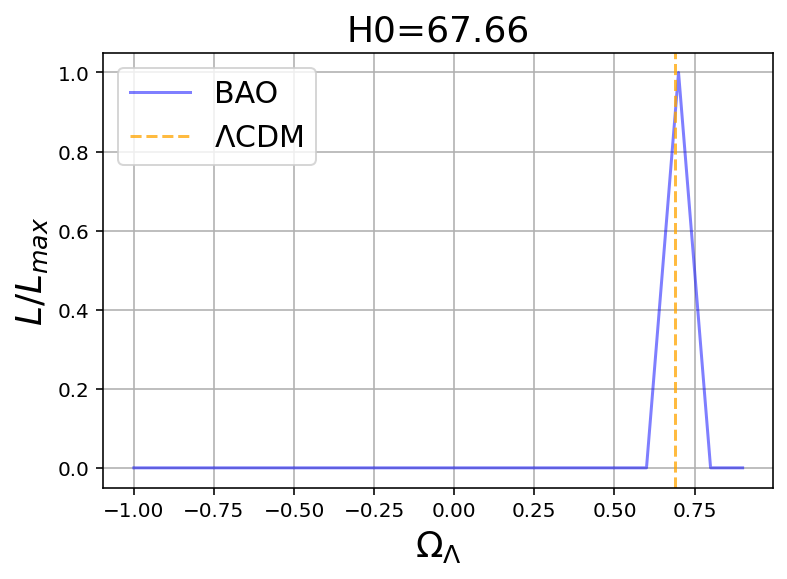

In [7]:
plt.plot(OMLBAO,likelBAO,c='b',alpha=0.5,label='BAO')
plt.axvline(0.69, ymin=0, ymax=max(likelBAO),c='orange',alpha=0.75,linestyle='--',label='$\Lambda$CDM')
plt.ylabel('$L/L_{max}$',size='18')
plt.xlabel(r'$\Omega_{\Lambda}$',size='18')
plt.legend(loc='best', prop={'size': 15})
plt.title('H0=67.66',size='18')
plt.grid()
plt.show()

In [8]:
dmBAO=pd.DataFrame({'LH_marg_om':likemBAO,'OM':OMSBAO})
dfmBAO_sort=dmBAO.sort_values('LH_marg_om',ascending=False).reset_index(drop=True)
dfLBAO=pd.DataFrame({'LH_marg_L':likelBAO,'OML':OMLBAO})
dfLBAO_sort=dfLBAO.sort_values('LH_marg_L',ascending=False).reset_index(drop=True)

## $D_V$ VS. Redshift based on the best fits of $\Omega_m$ and $\Omega_\Lambda$: 
<a name="DVvsZ"></a> 

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 872.70it/s]


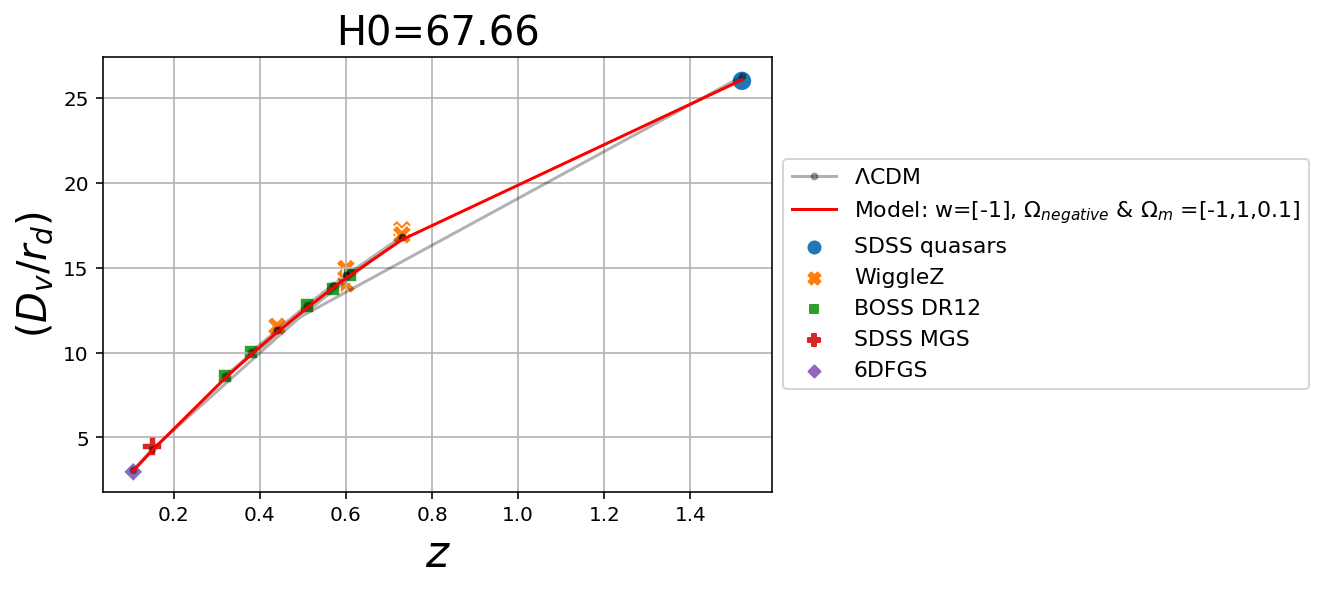

In [13]:
dl14 = [];lcdm = [];
for i in range(len(Dvz)):
    if (1 - dfmBAO_sort['OM'][0] - dfLBAO_sort['OML'][0]) > 0:
        dl14.append(Dvrdp(Dvz[i], dfmBAO_sort['OM'][0], dfLBAO_sort['OML'][0], 0, -1))
    elif (1 - dfmBAO_sort['OM'][0] - dfLBAO_sort['OML'][0]) == 0:
        dl14.append(Dvrd(Dvz[i], dfmBAO_sort['OM'][0], dfLBAO_sort['OML'][0], 0, -1))
    else:
        dl14.append(Dvrdneg(Dvz[i], dfmBAO_sort['OM'][0], dfLBAO_sort['OML'][0], 0, -1))
    lcdm.append(Dvrdflat(Dvz[i], OMP, OLP, 0, -1))

dl14 = np.array(dl14);dl14 = dl14[orderzd]
orderzd = np.argsort(Dvz);zDzsorted = Dvz[orderzd]

sns.scatterplot(x=Dvz, y=Dvrd, hue=DV['ref'], style=DV['ref'], s=100)
plt.plot(Dvz, np.array(lcdm), c='black', alpha=0.3, marker='.', label='$\Lambda$CDM')
plt.plot(zDzsorted, np.array(dl14), c='red', label='Model: w=[-1], $\Omega_{negative}$ & $\Omega_{m}$ =[-1,1,0.1]')
plt.ylabel(r'$(D_v/r_d)$', size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 11})
plt.xlabel('$z$', size="22")
plt.title('H0=67.66', size='20')
plt.grid(True)
plt.show()


## BAO Plots for $D_V$/$D_{V_{planck}}$ VS. Redshift <a name="DVvsZdata"></a> 

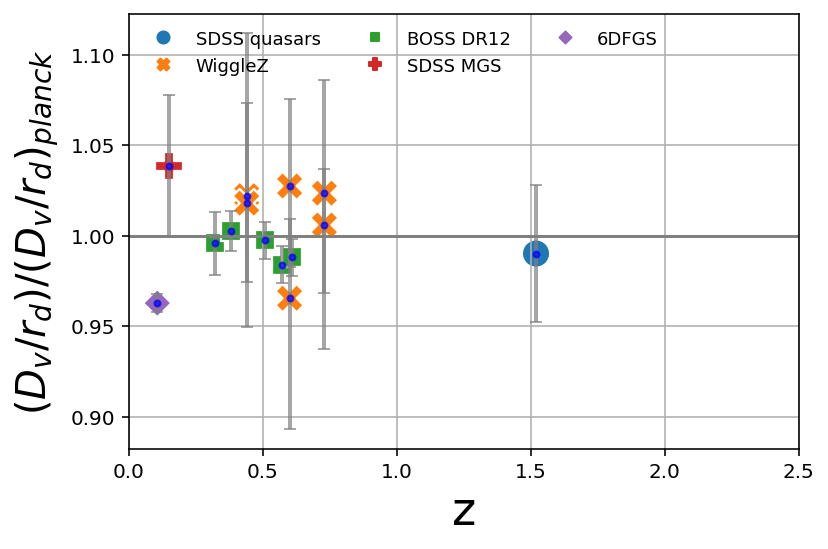

In [10]:
import seaborn as sns 

DVrdp=DV['Dv/rdrag planck'].values
err1=[DV['DV/rd_err_pos'],DV['DV/rd_err_neg']]
err2=[DV['Dmerrneg'],DV['Dmerrneg']]
col=['g','purple','r','b','c','black','pink','yellow']
ax = sns.scatterplot(x=Dvz, y=Dvrd/DVfpl, hue=DV['ref'], style=DV['ref'],s=200)
plt.errorbar(Dvz,Dvrd/DVfpl,yerr=err1/np.array(DVfpl),c='b',alpha=0.7,fmt='.',ecolor='gray', elinewidth=2, capsize=3,linestyle='none')

xx=np.linspace(0,2.5,len(Dvz))
plt.grid(True)
plt.plot(xx,[1]*len(Dvz),c='gray')
plt.xlim(0,2.5)
plt.legend(loc='upper left', scatteryoffsets=[0.55], frameon=False, fontsize=9, ncol=3)
plt.xticks(np.arange(0, 2.6, step=0.5))
plt.ylabel(r'$(D_v/r_d)/(D_v/r_d)_{planck}$',size=20)
plt.xlabel('z',size=23)
plt.yticks(np.arange(0.9, 1.1, step=0.05))
plt.show()